## Laboratorio 5

### Parte 1 - Análisis de paquetes

Maria Ines Vasquez Figueroa 18250

Diana Ximena de León Figueroa 18607

In [1]:
from scapy.all import *
import pandas as pd
import numpy as np
import binascii
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

In [2]:
pcap_file = rdpcap('analisis_paquetes.pcap')

In [3]:
num_of_packets_to_sniff = 100
pcap_scan = sniff(count=num_of_packets_to_sniff)

In [4]:
for packet in pcap_file:
    print(packet.src)

88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
88:e9:fe:6a:92:52
80:37:73:96:9b:db
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:96:9b:db
88:e9:fe:6a:92:52
80:37:73:9

In [5]:
ethernet_frame = pcap_file[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload #recupera la informacion de la capa 4

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / UDP / DNS Qry "b'google.com.'"  / Raw
Informacion del paquete:
IP / UDP / DNS Qry "b'google.com.'"  / Raw
Informacion del segmento:
UDP / DNS Qry "b'google.com.'"  / Raw
Data:
DNS Qry "b'google.com.'"  / Raw
###[ Ethernet ]### 
  dst       = 80:37:73:96:9b:db
  src       = 88:e9:fe:6a:92:52
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 961
     id        = 1
     flags     = 
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0x52e6
     src       = 10.1.10.53
     dst       = 84.54.22.33
     \options   \
###[ UDP ]### 
        sport     = domain
        dport     = domain
        len       = 941
        chksum    = 0xf60e
###[ DNS ]### 
           id        = 12
           qr        = 0
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 0
           z         = 0
           ad        = 

In [6]:
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)

print("Ethernet", pcap_file[ethernet_type])
print("IP", pcap_file[ip_type])
print("TCP", pcap_file[tcp_type])

print("UDP", pcap_file[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
IP <IP from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
TCP <UDP from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
UDP <UDP from analisis_paquetes.pcap: TCP:0 UDP:62 ICMP:0 Other:0>


In [7]:
def create_dataframe(pcap_packets):
    # Obtenemos los campos de IP/TCP/UDP que seran las columnas de nuestro DF
    ip_fields = [field.name for field in IP().fields_desc]
    tcp_fields = [field.name for field in TCP().fields_desc]
    udp_fields = [field.name for field in UDP().fields_desc]

    #Concatenamos todos los campos
    dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload', 'payload_raw', 'payload_hex']

    # Creamos un DF en blanco con los campos como columnas
    df = pd.DataFrame(columns=dataframe_fields)
    for packet in pcap_packets[IP]:
        # Obtenemos los valores de los campos de cada fila
        field_values = []
        # A;adimos todos los valores de los campos de IP al df
        for field in ip_fields:
            if field == 'options':
                # Obtenemos el numero de opciones del IP Header
                field_values.append(len(packet[IP].fields[field]))
            else:
                field_values.append(packet[IP].fields[field])

        field_values.append(packet.time)

        layer_type = type(packet[IP].payload)
        for field in tcp_fields:
            try:
                if field == 'options':
                    field_values.append(len(packet[layer_type].fields[field]))
                else:
                    field_values.append(packet[layer_type].fields[field])
            except:
                field_values.append(None)

        # Agregamos el payload
        field_values.append(len(packet[layer_type].payload))
        field_values.append(packet[layer_type].payload.original)
        field_values.append(binascii.hexlify(packet[layer_type].payload.original))
        # Agregamos la fila al df
        df_append = pd.DataFrame([field_values], columns=dataframe_fields)
        df = pd.concat([df, df_append], axis=0)

    # Reset Index
    df = df.reset_index()
    # Drop old index column
    df = df.drop(columns="index")
    
    return df

In [8]:
df_file = create_dataframe(pcap_file)

In [9]:
df_file.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,961,1,,0,64,17,21222,...,None,None,None,None,62990,None,None,933,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
1,4,5,32,84,58919,,0,122,17,13836,...,None,None,None,None,65061,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
2,4,5,0,975,1,,0,64,17,21208,...,None,None,None,None,36378,None,None,947,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
3,4,5,32,84,59493,,0,122,17,13262,...,None,None,None,None,65063,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
4,4,5,0,1012,1,,0,64,17,21171,...,None,None,None,None,63846,None,None,984,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


In [10]:
df_scan = create_dataframe(pcap_scan)

In [11]:
df_scan.head(5)

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,120,51754,,0,55,17,45382,...,None,None,None,None,62671,None,None,92,"b""\x01\x01\x00H!\x12\xa4BWBYhFIDyROnJ\x00\x06\...",b'010100482112a4425742596846494479524f6e4a0006...
1,4,5,0,149,0,,0,55,17,31572,...,None,None,None,None,51191,None,None,121,"b""\x92oL;5\xa3x[\x00\x00\x1a\n<r\xadC\x00\x00\...",b'926f4c3b35a3785b00001a0a3c72ad430000002abede...
2,4,5,0,138,28125,,0,128,17,50305,...,None,None,None,None,7575,None,None,110,"b'\x90oi]/\x8e\x8b\xedXw%z\xbe\xde\x00\x03""[\x...",b'906f695d2f8e8bed5877257abede0003225bbdd83146...
3,4,5,0,144,0,,0,55,17,31577,...,None,None,None,None,52116,None,None,116,b'\x92oL<5\xa3|\x1b\x00\x00\x1a\n<r\xadC\x00\x...,b'926f4c3c35a37c1b00001a0a3c72ad430000002abede...
4,4,5,0,70,28126,,0,128,17,50372,...,None,None,None,None,19127,None,None,42,"b""\xaf\xcd\x00\x06X\x93HfX\x11B\x10\xf4?_q\x95...",b'afcd00065893486658114210f43f5f71952427c1d337...


In [12]:
df = pd.concat([df_file, df_scan], ignore_index = True)

In [13]:
# Src Address, Dst Address, Src Port, Dst Port
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
157,74.125.250.113,192.168.2.109,19305,50337
158,74.125.250.113,192.168.2.109,19305,50337
159,192.168.2.109,74.125.250.113,50337,19305
160,192.168.2.109,74.125.250.113,50337,19305


#### Estadísticas 

a. Muestre cual es la IP origen que más aparece 

In [14]:
frequent_src_address = df['src'].describe()['top']

print(frequent_src_address)

192.168.2.109


b. Muestre cual es la IP destino que más aparece 

In [15]:
frequent_dst_address = df['dst'].describe()['top']

print(frequent_dst_address)

192.168.2.109


c. ¿A qué IPs se comunica la IP del inciso a? 

In [19]:
print(df[df['src'] == frequent_src_address]['dst'].unique())

['74.125.250.113' '142.250.217.238' '142.250.64.238']


d. ¿A qué puertos destino se comunica la IP del inciso a? 

In [20]:
print(df[df['src'] == frequent_src_address]['dport'].unique())

[19305 443]


e. ¿A qué puertos origen se comunica la IP del inciso a? 

In [21]:
print(df[df['src'] == frequent_src_address]['sport'].unique())

[50337 50621 51767]


f. ¿Para que se utiliza el puerto que más aparece en el inciso  d y e? 

#### Gráficas

a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads 
enviados de dichas direcciones. 

<AxesSubplot:xlabel='src'>

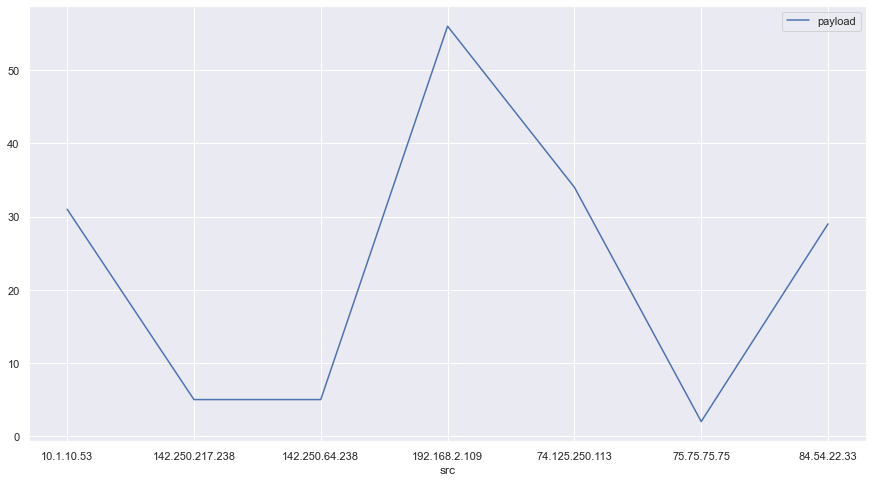

In [23]:
df.groupby('src').count()['payload'].plot(legend=True, figsize=(15, 8))

b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads 
recibidos en dichas direcciones. 

<AxesSubplot:xlabel='dst'>

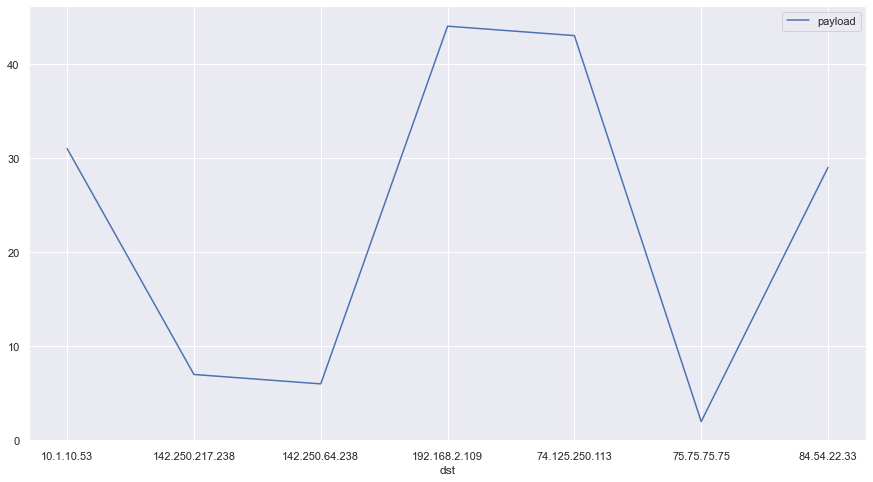

In [24]:
df.groupby('dst').count()['payload'].plot(legend=True, figsize=(15, 8))

c. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los 
payloads enviados de dichos puertos. 

<AxesSubplot:xlabel='sport'>

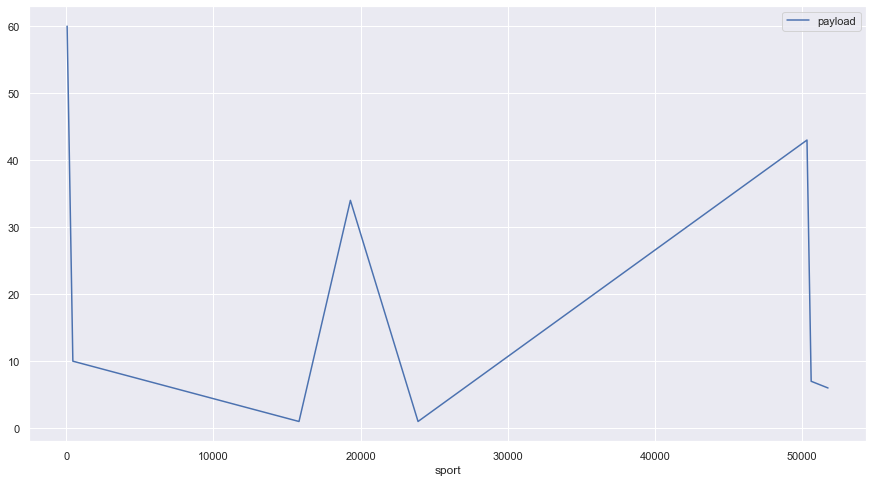

In [27]:
df.groupby('sport').count()['payload'].plot(legend=True, figsize=(15, 8))

d. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los 
payloads recibidos en dichos puertos. 

<AxesSubplot:xlabel='dport'>

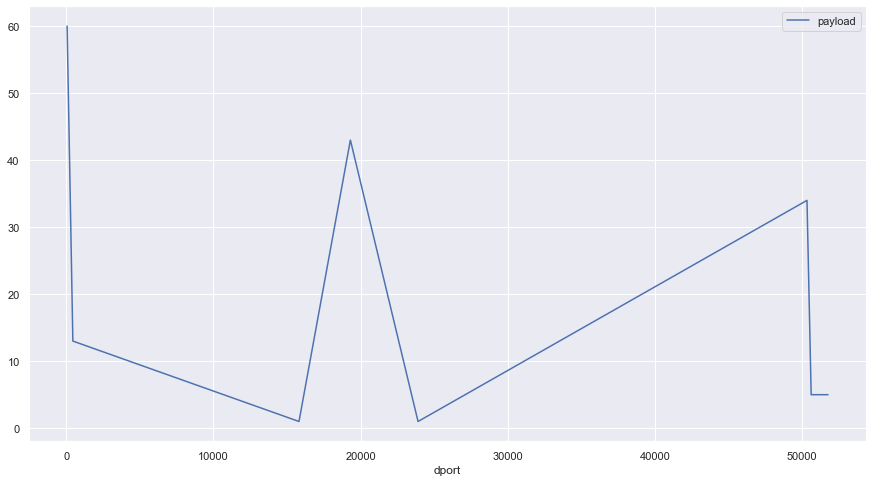

In [28]:
df.groupby('dport').count()['payload'].plot(legend=True, figsize=(15, 8))

In [16]:
df.to_csv('pcap_final.csv', index = False)